<h1 style="color:#034e7d; font-size:50px; font-family:MV Boli; text-align:center;">Tasks Notebook</h1>

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 1</h1>

Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as math. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.
Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_{0}$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_{i}$ and the next $z_{i+1}$ is less than some threshold, say $0.01$.

$$ z_{i+1} = z_i - \frac{z_i \times z_i - x}{2z_i} $$

## Sqrt

Calculating the square root to within 0.01 of the exact square root.

In [18]:
def sqrt(x):
    # Starting out with an inital guess of half the value as the square
    # root must be smaller than the value
    z1 = 0.5*x

    # Refine the guess and compare the 2 values repeatedly until they
    # are within 0.01 of each other.
    z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    while z2 < z1-0.01 or z2 > z1+0.01:
        z1 = z2
        z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    
    return z1

sqrt(26)

5.099037252729456

This function (sqrt2) calculates the square root to  the exact square root.

In [19]:
def sqrt2(x):
    z1 = 0.5*x # Initial guess
    z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    while z2 != z1:
        z1 = z2
        z2 = z1 - (((z1 * z1) - x) / (2 * z1))
    
    return z1

sqrt2(26)

5.0990195135927845

Verifying the answer with the actual square root

In [20]:
26**0.5

5.0990195135927845

## End Task 1
***

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">Task 2</h1>

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

Drink v Biscuits

|  | Chocolate | Plain |
| --- | --- | --- |
| Tea | 43 | 57 |
| Coffee | 56 | 45 |

# Chi-Square Tests

***

In [21]:
# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

In [22]:
# 43 people who prefer Coffee and Chocolate biscuits
coffee_choc = [['Coffee', 'Chocolate']] * 43
#coffee_choc = [['Coffee', 'Chocolate']] * 10 # Trying it with different values

# Show.
coffee_choc

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [23]:
# 43 people who prefer Coffee and Chocolate biscuits
tea_choc = [['Tea', 'Chocolate']] * 56
#tea_choc = [['Tea', 'Chocolate']] * 85  # Trying it with different values

# Show.
tea_choc

[['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'C

In [24]:
# 43 people who prefer Coffee and Chocolate biscuits
coffee_plain = [['Coffee', 'Plain']] * 57
#coffee_plain = [['Coffee', 'Plain']] * 90  # Trying it with different values

# Show.
coffee_plain

[['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee'

In [25]:
# 43 people who prefer Coffee and Chocolate biscuits
tea_plain = [['Tea', 'Plain']] * 45
#tea_plain = [['Tea', 'Plain']] * 15  # Trying it with different values

# Show.
tea_plain

[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain']]

In [26]:
# Raw data, merge the four lists.
raw_data = coffee_choc + tea_choc + coffee_plain + tea_plain

# Show.
raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [27]:
# Shuffle the data.
random.shuffle(raw_data)

# Show.
raw_data

[['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],

In [28]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

# Show.
drink, biscuit

(('Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coff

In [29]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Tea,Plain
1,Coffee,Plain
2,Tea,Plain
3,Coffee,Plain
4,Coffee,Plain
...,...,...
196,Coffee,Plain
197,Tea,Chocolate
198,Coffee,Plain
199,Tea,Plain


## Contingency Table

***

In [30]:
# It does not give us what we want, just the different observations and their count
res = ss.contingency.crosstab(df)
res

CrosstabResult(elements=(array(['Chocolate', 'Coffee', 'Plain', 'Tea'], dtype=object),), count=array([ 99, 100, 102, 101]))

In [31]:
# Perform Crosstabs Contingency.
# Returns a table of counts for each possible unique combination in *args
# areguments of sequences must be the same length
cross = ss.contingency.crosstab(df['Drink'], df['Biscuit'])

# Show.
# 43 prefer coffee and choc biscuits, 57 prefer coffee and plain biscuits
# 56 prefer tes and choc biscuits, 45 prefer tea and plain biscuits
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [32]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

In [33]:
cross.count

array([[43, 57],
       [56, 45]])

In [34]:
# Do the statistics. Just do them
# Second row in Laerd Statistics (Continuity Correction)
result = ss.chi2_contingency(cross.count, correction=False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [35]:
# The expected Frequencies if independant
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

In [36]:
# Coffee drinkers that prefer Chocolate biscuts
43/57

0.7543859649122807

In [37]:
# both drinkers that prefer Chocolate biscuts
99/201

0.4925373134328358

In [39]:
100*(99/201)

49.25373134328358

## Conclusions

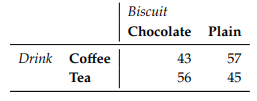

"A p-value is the probability of obtaining data as extreme or more extreme than a set of collected data...A p-value of less than or equal to 0.05 is regarded as evidence of a statistically significant result, and in these cases, the null hypothesis should be rejected in favor of the alternative hypothesis." (David, n.d.)

The null hypothesis is that A preference for type of biscuit has no relationship with the type of preferred drink.
Based on the p-value, which states there is approximately 7.78% probability that the drink and biscuit preference have a relationship.
At a confidence level of 0.05 there is not enough evidence to reject the null hypothesis that drink and biscuit have no relationship. What this tells us id that we cannot state to a 95% confidence that there is no relationship between biscuit and drink type. At a 90% confidence (p-value less than 0.1) We could reject the null hypothesis and assume there is a relationship between the biscuit and drink type.

<h1 style="color:#595959; font-size:46px; font-family:MV Boli; text-align:center;">References</h1>

Davis, Andrew (n.d.) <em>How to Interpret the p-Value for the Chi-Square Test for Goodness of Fit.</em> Available at: https://study.com/skill/learn/how-to-interpret-the-p-value-for-the-chi-square-test-for-goodness-of-fit-explanation.html (Accessed 25 October 2023)
